In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

drive/  sample_data/


In [ ]:
cd "drive/My Drive/Internship"

/content/drive/My Drive/Internship


In [ ]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# reading the data
df = pd.read_csv('MSFT.csv')
print(df.head())
print('\n Shape of the data:')
print(df.shape)

         Date        Open        High  ...       Close   Adj Close    Volume
0  2019-07-09  136.000000  136.970001  ...  136.460007  134.801239  19953100
1  2019-07-10  137.130005  138.580002  ...  137.850006  136.174347  24204400
2  2019-07-11  138.199997  139.220001  ...  138.399994  136.717636  22327900
3  2019-07-12  138.850006  139.130005  ...  138.899994  137.211563  18936800
4  2019-07-15  139.440002  139.539993  ...  138.899994  137.211563  16651500

[5 rows x 7 columns]

 Shape of the data:
(253, 7)


In [ ]:
# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

In [ ]:
#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

In [ ]:
# splitting into train and validation
train = new_data[:201]
valid = new_data[201:]

In [ ]:
# shapes of training set
print('\n Shape of training set:')
print(train.shape)



 Shape of training set:
(201, 2)


In [ ]:
# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)


 Shape of validation set:
(52, 2)


In [ ]:
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-52+i:].sum() + sum(preds)
    b = a/52
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)


 RMSE value on validation set:
28.961504780998208


In [ ]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 16,8

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


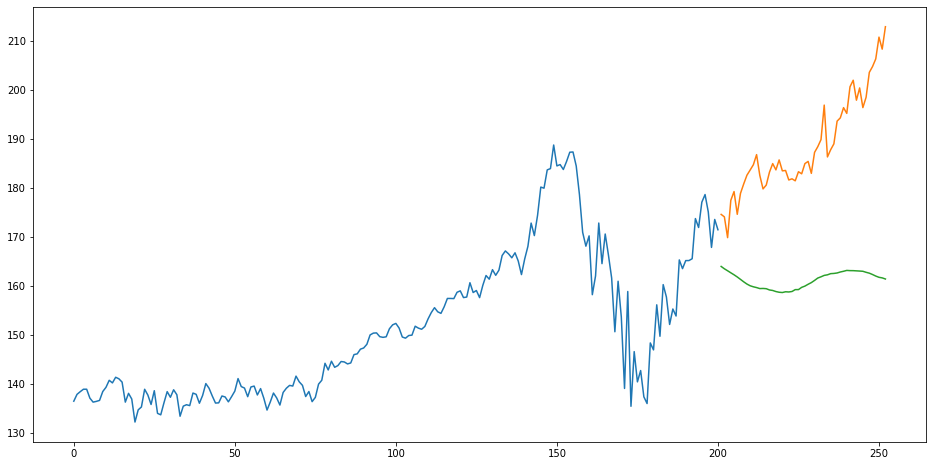

In [ ]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])